In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import io
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving SMSSpamCollection.csv to SMSSpamCollection.csv


In [ ]:
df = pd.read_csv('SMSSpamCollection.csv',error_bad_lines=False,names=['Spam','Message'],sep='\t')
df.head()

,Spam,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Cleaning the text



In [ ]:
stemmer = PorterStemmer()

In [ ]:
corpus = []
for i in range(len(df)):
  review = re.sub('[^a-zA-Z]',' ',df['Message'][i])
  review = review.lower()
  review = review.split()
  review = [stemmer.stem(word) for word in review if word not in stopwords.words('english')]
  #review = list(filter(lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct, review))
  review = ' '.join(review)
  corpus.append(review)

In [ ]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [ ]:
len(corpus)

4837

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5500)
x = cv.fit_transform(corpus).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Dumping the count vectorizer

In [ ]:
pickle.dump(cv,open('cv.pkl','wb'))

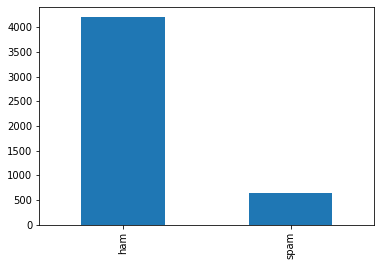

In [ ]:
import matplotlib.pyplot as plt
df['Spam'].value_counts().plot(kind='bar')

In [ ]:
y = pd.get_dummies(df['Spam'])
y = y.iloc[:,1].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

#### Modeling and Training
##### Splitting data into train and validation sets using train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

1. Gaussian Nb - for features with decimal form
2. Multinomial Nb - for features with discrete value 
3. Bernoulli nb - for features with boolean value

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred = nb.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

Evaluating the model

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_pred,y_test)
ac = accuracy_score(y_test,y_pred)
print("Accuracy_score :",ac)
print("\nConfusion Matrix:\n",cm)


Accuracy_score : 0.9824380165289256

Confusion Matrix:
 [[820   3]
 [ 14 131]]


In [ ]:
pickle.dump(nb,open('spam.pkl','wb'))

In [ ]:
loaded_model = pickle.load(open('spam.pkl','rb'))
loaded_model.predict(x_test)
loaded_model.score(x_test,y_test)

0.9824380165289256

Prediction for new mail


In [ ]:
def new_review(new_review):
  new_review = new_review
  new_review = re.sub('[^a-zA-Z]',' ',new_review)
  new_review = new_review.lower()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  new_review = [ stemmer.stem(word) for word in new_review if word not in all_stopwords]
  new_review = ' '.join(new_review)
  new_corpus = [new_review]
  x_pred    = cv.transform(new_corpus).toarray()
  y_pred    = loaded_model.predict(x_pred)
  return y_pred

new = new_review(str(input("Enter email to check: ")))
print(new)
if new == 1:
  print("Spam")
else:
  print("Not Spam")


Enter email to check: hope you are well regards,me
[0]
Not Spam
